# Example implementation of Grover's algorithm

Grover's algorithm is a quantam algorithm to find a value in a list in $O(\sqrt{N})$ time complexity, where as a classical computer would take $O(N)$ time complexity. This uses quantam properties to achieve this speedup.

First import all modules were going to use.

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

Initialise the quantam circuit by making them all have the same probability. We are applying the algorithm on a circut with 3 qubits. Mathematically, we are transforming $\bra{000}$ into $\frac{\bra{000}+\bra{001}+\bra{010}+\bra{011}+\bra{100}+\bra{101}+\bra{110}+\bra{111}}{\sqrt{8}}$. We can also visualise this.

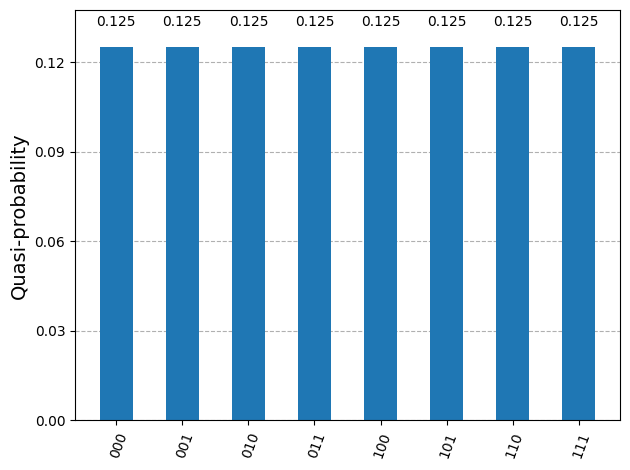

In [2]:
# Create a quantum circuit with 3 qubits and apply Hadamard gates
qc = QuantumCircuit(3)
qc.h([0, 1, 2])

# Visualise circuit results
dist = Statevector.from_instruction(qc).probabilities_dict()
plot_histogram(dist)

Then we apply an oracle that flips the qubit we want to finds probability.

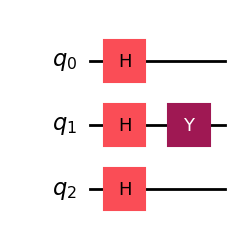

In [3]:
# Apply a Pauli-Y gate to qubit 1
qc.y(1)

# Visualise updated circuit
qc.draw('mpl')

Then we apply the grover diffusion operator to increase the flipped quibits probability. More specifically, we are flipping the qubits about the mean.

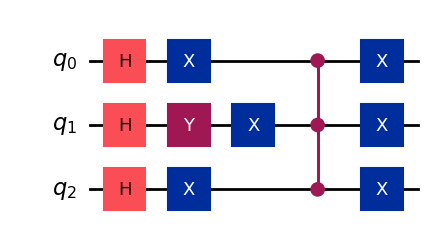

In [4]:
# Apply grover diffusion operator (inversion about the mean)
qc.x([0, 1, 2])
qc.ccz(0, 1, 2)
qc.x([0, 1, 2])

# Visualise updated circuit
qc.draw('mpl')


Apply hadamard gate to all qubits again to get results. Then we can visualise the results.

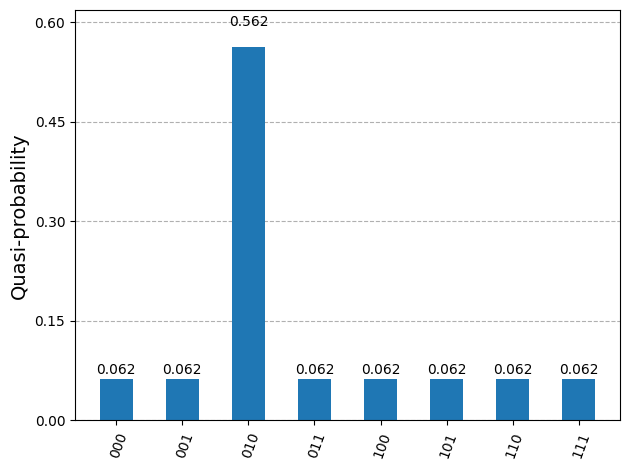

In [5]:
# Apply Hadamard gates again
qc.h([0, 1, 2])

# Visualise results
dist = Statevector.from_instruction(qc).probabilities_dict()
plot_histogram(dist)

We can see that the probability for $\bra{010}$ has increased, as expected. We can repeat if necessary. Specifically, $\frac{\pi}{4}\sqrt{N}$ iterations is the max required.

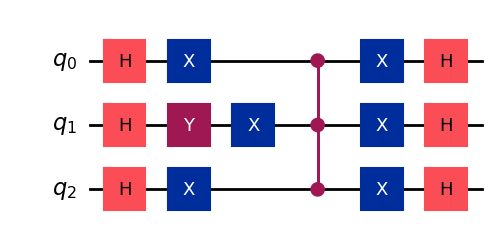

In [6]:
# Final circuit visualization
qc.draw('mpl')